In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import psd

## define parameters

In [4]:
length = 100. #nondimensional length of window
height = 0.2 #window height
N = 1000 #number of vortices
gammas = 1. #vortex strength RMS (normal distribution)
rscale = 0.1 #vortex size scale (rayleigh distribution parameter)
t0 = -10.#start time for observation of convection
t1 = 10.#end time
ts = 0.001 # time step
v0 = 5 #convection speed

## set random distribution for vortex location, size and strength
origin at window center

In [5]:
vortx = np.random.uniform(low=-length/2,high=length/2,size=N)
vorty = np.random.uniform(low=-height/2,high=height/2,size=N)
vortX = np.vstack((vortx,vorty))
gamma = np.random.normal(scale=gammas,size=N)
#gamaa = np.random.normal(-0.5,0.5,N)
#print gamma
rho = np.random.rayleigh(scale=rscale,size=N)

## set relative locations for observation
vortex window moves to the right
t=0 means observation in the center of the window

In [6]:
t = np.arange(t0,t1,ts)
obsx = -v0*t
obsy = np.zeros_like(obsx)
obsX = np.vstack((obsx,obsy))

## Vortex models
#### Gaussian shape vortex: $u_\theta = 18\Gamma  \rho^{-3} e^{-9 \rho^{-4} {\boldsymbol{{r}}}^{2}}r$
#### Point vortex (singularity at the center): $u_\theta = \frac{\Gamma}{2 \pi r}$
#### Zero velocity at the absolute center: $u_\theta = \frac{\Gamma r}{2\pi \rho^2}$
#### Combination of point vortex and zero velocity at the center vortex : $minimum of$ $u_\theta = \frac{\Gamma}{2 \pi r}$ $and$ $u_\theta = \frac{\Gamma r}{2\pi \rho^2}$
#### Lamb-Oseen vortex: $u_\theta = \frac{\Gamma}{2{\pi}r}\left ( 1-exp\left ( -\frac{r^2}{\rho^2} \right ) \right )$
#### Mexican-Hat shape vortex: $u_\theta = 16 \Gamma r \rho^{-3}exp\left ( -\left ( \sqrt{8}\rho^{-2}r \right )^{2} \right )\left ( 3-\left ( 4\rho^{-2}r \right )^{2} \right )$

In [7]:
dist = obsX[:,:,np.newaxis]-vortX[:,np.newaxis,:] # dim 2 x timesteps x N
r = np.sqrt((dist*dist).sum(0)) # dim timesteps x N

'''comment out one of the two following lines to get alternative vortex models:'''

utheta1 = 18 * gamma * (rho**(-3)) * np.exp((-9*r**2) / (rho**4)) * r   # Gaussian shape function vortex

utheta2 = (0.5/np.pi)*(1/r)                                             # Point vortex with singularity at the center

#utheta = (0.5/np.pi)*gamma*np.minimum(1/r,r/rho)                       # Wrong because r/rho is dimensionaless :dim timesteps x N:

utheta3 = (0.5/np.pi)*gamma*np.minimum(1/r,r/rho**2)                    # Gaussian shape 2

#utheta = (0.5/np.pi)*gamma/r/r                                         # Wrong because it's divinding the function twice by 'r'

#utheta = gamma*rho**(1.5)*np.exp(-9*rho*rho*r*r)                       # Wrong

utheta4 = (0.5/np.pi)*(1/r)*(1-np.exp(-(r**2)/rho**2))                  # Lamb-Oseen vortex

utheta5 = 16 * gamma * (rho**(-3)) * np.exp(-8*(rho**(-4)) * r**2) * (3-(16 * (rho**(-4)) * r**2)) * r  # Mexican-hat shape

# into cartesian coords

uind1 = utheta1 * dist[::-1] # dim 2 x timesteps x N
uind1[0] *= -1 # change sign for ux (to get correct rotation)
# sum over vortices
utot1 = uind1.sum(2) # dim 2 x timesteps

uind2 = utheta2 * dist[::-1] # dim 2 x timesteps x N
uind2[0] *= -1 # change sign for ux (to get correct rotation)
# sum over vortices
utot2 = uind2.sum(2) # dim 2 x timesteps

uind3 = utheta3 * dist[::-1] # dim 2 x timesteps x N
uind3[0] *= -1 # change sign for ux (to get correct rotation)
# sum over vortices
utot3 = uind3.sum(2) # dim 2 x timesteps

uind4 = utheta4 * dist[::-1] # dim 2 x timesteps x N
uind4[0] *= -1 # change sign for ux (to get correct rotation)
# sum over vortices
utot4 = uind4.sum(2) # dim 2 x timesteps

uind5 = utheta5 * dist[::-1] # dim 2 x timesteps x N
uind5[0] *= -1 # change sign for ux (to get correct rotation)
# sum over vortices
utot5 = uind5.sum(2) # dim 2 x timesteps

## plot time histories and psd for induced velocity

<IPython.core.display.Javascript object>


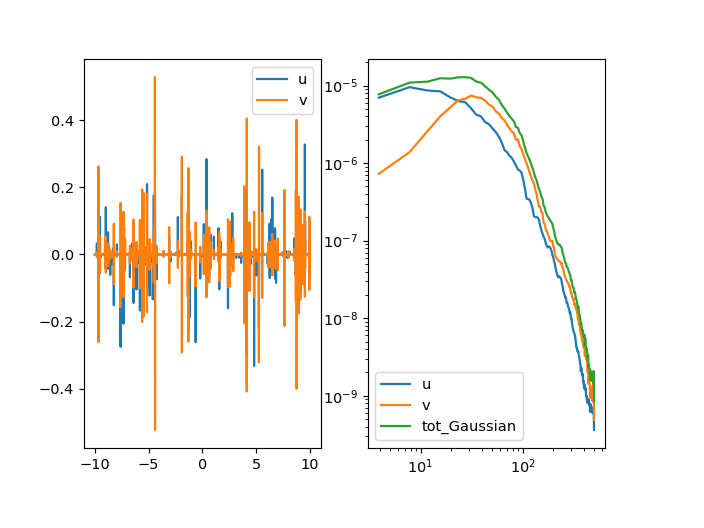

<IPython.core.display.Javascript object>


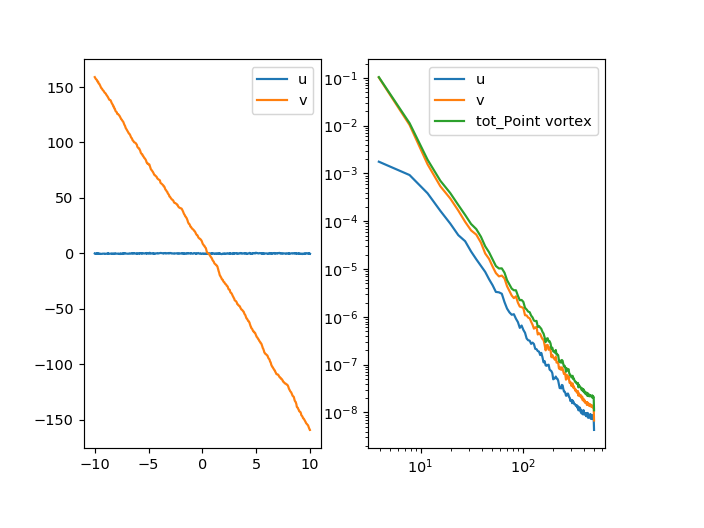

<IPython.core.display.Javascript object>


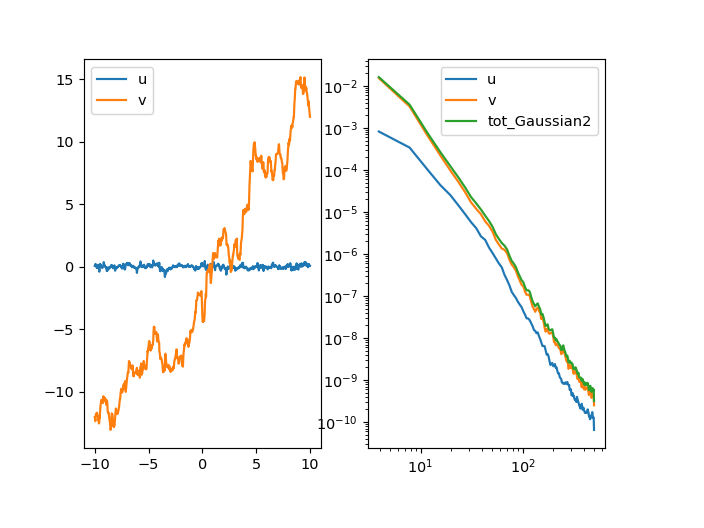

<IPython.core.display.Javascript object>


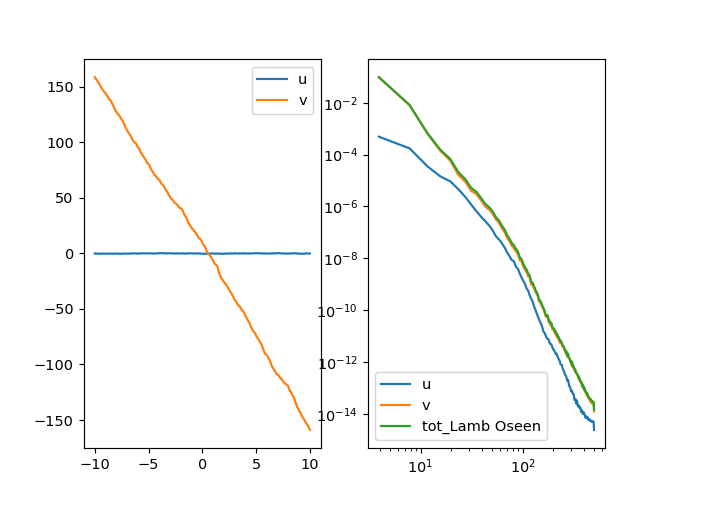

<IPython.core.display.Javascript object>


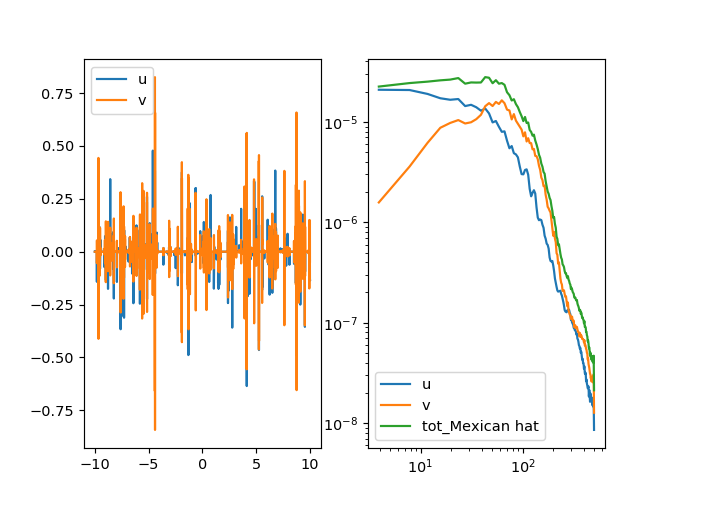

In [18]:
#Evk.append((110 * Urms**2 * Lt**5 * i**4 *2*np.pi/U)/(27 * np.pi * 0.298 * ((1 + (1.83 * i**2 * Lt**2))**(17/6))))
#kc = math.gamma(0.5) * math.gamma(0.833) / (Lt * math.gamma(0.33))
#Evk.append(((110 * Urms**2 * Lt) / (27 * np.pi)) * ((i/kc)**4 / (1 + (i/kc)**2)**(17/6)))
    
plt.figure(1)
plt.subplot(1,2,1)
plt.plot(t,utot1[0],label='u')
plt.plot(t,utot1[1],label='v')
plt.legend()
plt.subplot(1,2,2)
(valu,freq) = psd(utot1[0],Fs=1/ts,detrend='mean')
(valv,freq) = psd(utot1[1],Fs=1/ts,detrend='mean')
plt.loglog(freq[1:],valu[1:],label='u')
plt.loglog(freq[1:],valv[1:],label='v')
plt.loglog(freq[1:],valu[1:]+valv[1:],label='tot_Gaussian')
plt.legend()

plt.figure(2)
plt.subplot(1,2,1)
plt.plot(t,utot2[0],label='u')
plt.plot(t,utot2[1],label='v')
plt.legend()
plt.subplot(1,2,2)
(valu,freq) = psd(utot2[0],Fs=1/ts,detrend='mean')
(valv,freq) = psd(utot2[1],Fs=1/ts,detrend='mean')
plt.loglog(freq[1:],valu[1:],label='u')
plt.loglog(freq[1:],valv[1:],label='v')
plt.loglog(freq[1:],valu[1:]+valv[1:],label='tot_Point vortex')
plt.legend()

plt.figure(3)
plt.subplot(1,2,1)
plt.plot(t,utot3[0],label='u')
plt.plot(t,utot3[1],label='v')
plt.legend()
plt.subplot(1,2,2)
(valu,freq) = psd(utot3[0],Fs=1/ts,detrend='mean')
(valv,freq) = psd(utot3[1],Fs=1/ts,detrend='mean')
plt.loglog(freq[1:],valu[1:],label='u')
plt.loglog(freq[1:],valv[1:],label='v')
plt.loglog(freq[1:],valu[1:]+valv[1:],label='tot_Gaussian2')
plt.legend()

plt.figure(4)
plt.subplot(1,2,1)
plt.plot(t,utot4[0],label='u')
plt.plot(t,utot4[1],label='v')
plt.legend()
plt.subplot(1,2,2)
(valu,freq) = psd(utot4[0],Fs=1/ts,detrend='mean')
(valv,freq) = psd(utot4[1],Fs=1/ts,detrend='mean')
plt.loglog(freq[1:],valu[1:],label='u')
plt.loglog(freq[1:],valv[1:],label='v')
plt.loglog(freq[1:],valu[1:]+valv[1:],label='tot_Lamb Oseen')
plt.legend()

plt.figure(5)
plt.subplot(1,2,1)
plt.plot(t,utot5[0],label='u')
plt.plot(t,utot5[1],label='v')
plt.legend()
plt.subplot(1,2,2)
(valu,freq) = psd(utot5[0],Fs=1/ts,detrend='mean')
(valv,freq) = psd(utot5[1],Fs=1/ts,detrend='mean')
plt.loglog(freq[1:],valu[1:],label='u')
plt.loglog(freq[1:],valv[1:],label='v')
plt.loglog(freq[1:],valu[1:]+valv[1:],label='tot_Mexican hat')
plt.legend()

## Find von Kárman spectrum that fits the Guu (E11) best and plot it.

In [16]:
def Guu(f,uu,tt):
    return 4*uu*uu*tt/(1+(2*np.pi*f*tt)**2)
from scipy import optimize
opti,_ = optimize.curve_fit(Guu,freq[1:],valu[1:]) # it is probably better to use the log of Guu and of valu here
uuopt,ttopt = opti
plt.loglog(freq[1:],Guu(freq[1:],uuopt,ttopt))

C:\ProgramData\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
